# Cowface Identifier (BFMatcher)

In [12]:
import torch
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from yolov5.models.common import Detections
%matplotlib inline

In [13]:
# Load custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

Using cache found in /Users/adam/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-4 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [14]:
def detect(filename: str) -> tuple[pd.DataFrame, np.ndarray]:
  """
  Run inference on the given image & return the resulting DataFrame & image.
  :param filename:
  :return:
  """

  # Run inference on the image
  results: Detections = model(filename)
  # Get the DataFrame
  df: pd.DataFrame = results.pandas().xyxy
  # Display the image
  results.render()
  filename: np.ndarray = results.ims[0]
  return df, filename

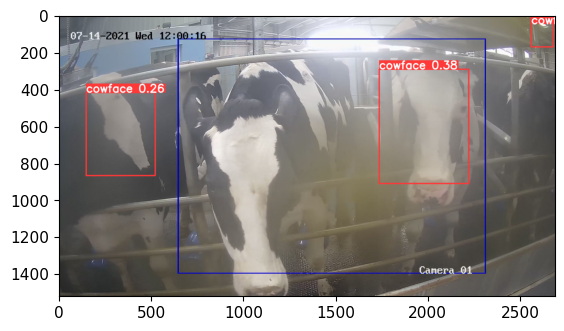

In [15]:
df, img = detect('data/datasets/bfmatcher/test_1.jpg')
plt.imshow(img)
plt.show()

In [16]:
df2 = detect('data/datasets/bfmatcher/test_2.jpg')

In [17]:
df3 = detect('data/datasets/bfmatcher/test_3.jpg')

## Matching

(1520, 2688, 3)


Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


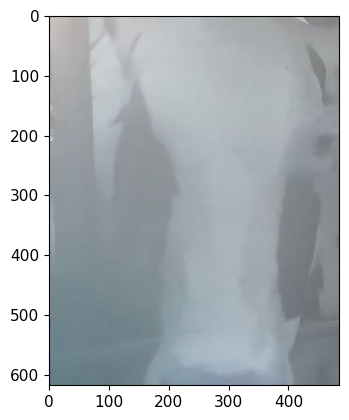

In [18]:
img1 = cv2.imread('data/datasets/bfmatcher/test_1.jpg')
print(img1.shape)
img1 = img1[293:911, 1735:2220]

img2 = cv2.imread('data/datasets/bfmatcher/test_2.jpg')
img2 = img2[271:898, 1497:1973]

plt.imshow(img1)
plt.show()

0
0


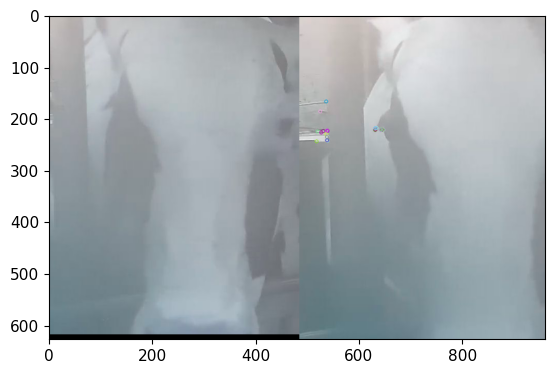

In [19]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

print(len(kp1))

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

print(len(matches))

for m in matches:
  print(m.distance)

match_result = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
plt.imshow(match_result)
plt.show()